In [2]:
from __future__ import division
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

def nothing(x):
    pass

# parametros de ajuste
invertir_threshold = True
umbral = 100
kernel_apertura = (3,3)
iter_apertura = 4
kernel_cierre = (3,3)
iter_cierre = 5

# Importar imagen del dataset
ruta_img = 'E:/UTN/PES/TP/Datasets/BSDS/BSDS300/images/train/314016.jpg'
imagen = cv2.imread(ruta_img,1)
# Se transforma la imagen BRG a HSV
imagen = cv2.cvtColor(imagen, cv2.cv.CV_BGR2HSV)


fig = plt.figure(figsize=(18,12))
plt.title("Imagen: {}".format(ruta_img.split('/')[-1]),color="white")
plt.xticks([]),plt.yticks([])
# Se grafica la imagen con MATPLOTLIB
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_HSV2RGB)
plt.imshow(imagen_rgb, interpolation = 'bicubic')

plt.show()

<Figure size 1800x1200 with 1 Axes>

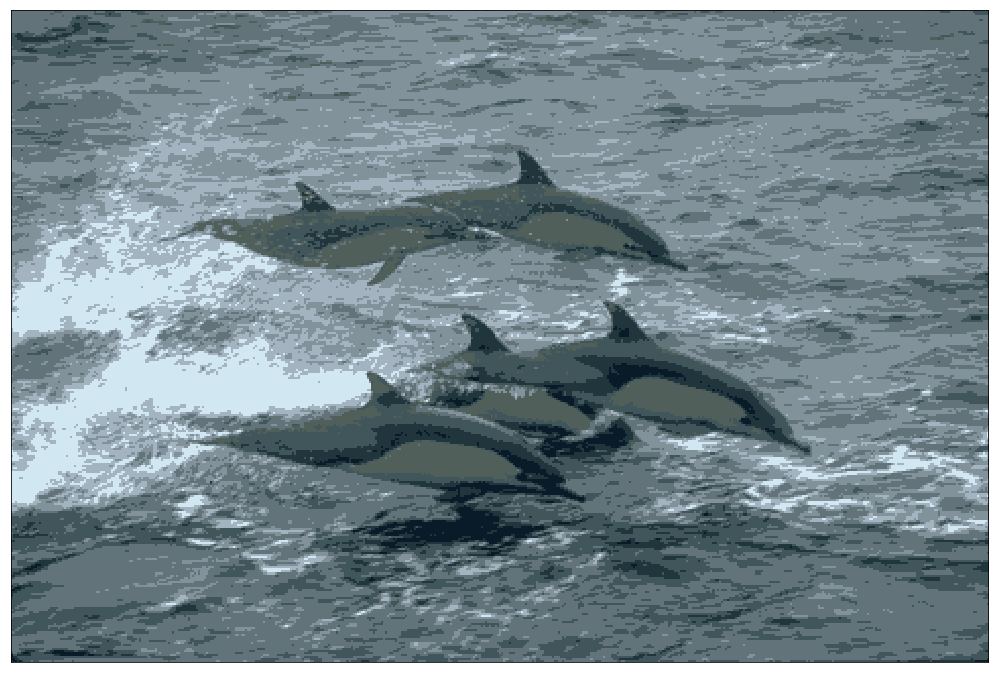

In [3]:
## Probando K-Means (OpenCV)

Z = imagen.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8

ret,label,center = cv2.kmeans(Z, K, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((imagen.shape))

res2_rgb = cv2.cvtColor(res2,cv2.COLOR_HSV2RGB)
fig = plt.figure(figsize=(18,12))
plt.imshow(res2_rgb)
plt.xticks([]),plt.yticks([])
plt.show()


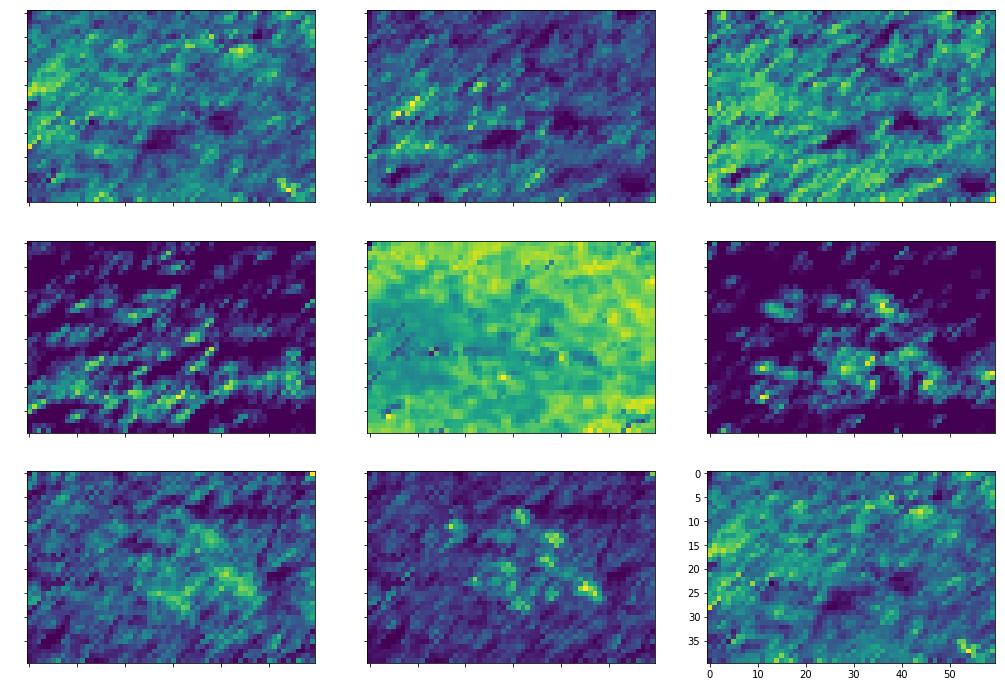

In [4]:
## Probando Histograma de gradientes orientados (OpenCV)

res2_bgr = cv2.cvtColor(res2,cv2.COLOR_HSV2BGR)

img = np.copy(res2_bgr)

cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins

# winSize is the size of the image cropped to an multiple of the cell size
hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
hog_feats = hog.compute(img)\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first
# hog_feats now contains the gradient amplitudes for each direction,
# for each cell of its group for each group. Indexing is by rows then columns.

gradients = np.zeros((n_cells[0], n_cells[1], nbins))

# count cells (border cells appear less often across overlapping groups)
cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_feats[:, :, off_y, off_x, :]
        cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

# Se promedian los gradientes
gradients /= cell_count

# En el vector gradientes se encuentran los histogramas de gradientes orientados
# dicho vector es una grilla 2D de histogramas

#imagen_rgb = cv2.cvtColor(imagen,cv2.COLOR_HSV2RGB)
#
#plt.imshow(imagen_rgb)
fig = plt.figure(figsize=(18,12))
plt.subplots_adjust(wspace=0.05)
plt.xticks([]),plt.yticks([])
for a in range(0,nbins): # el angulo es 360 / nbins * direccion
    plt.xticks(color="white"),plt.yticks(color="white") 
    plt.subplot(3,3,a+1),plt.imshow(gradients[:, :, a])    
#plt.colorbar()
plt.show()